In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler                    #sklearn.preprocessing module is used for standardizing features by removing the mean and scaling them to unit variance
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
# Read data file
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
data.isnull().sum()       #calculates the sum of missing values for each column in the DataFrame

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<ipython-input-6-77a50870cc2c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-6-77a50870cc2c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-6-77a50870cc2c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in 

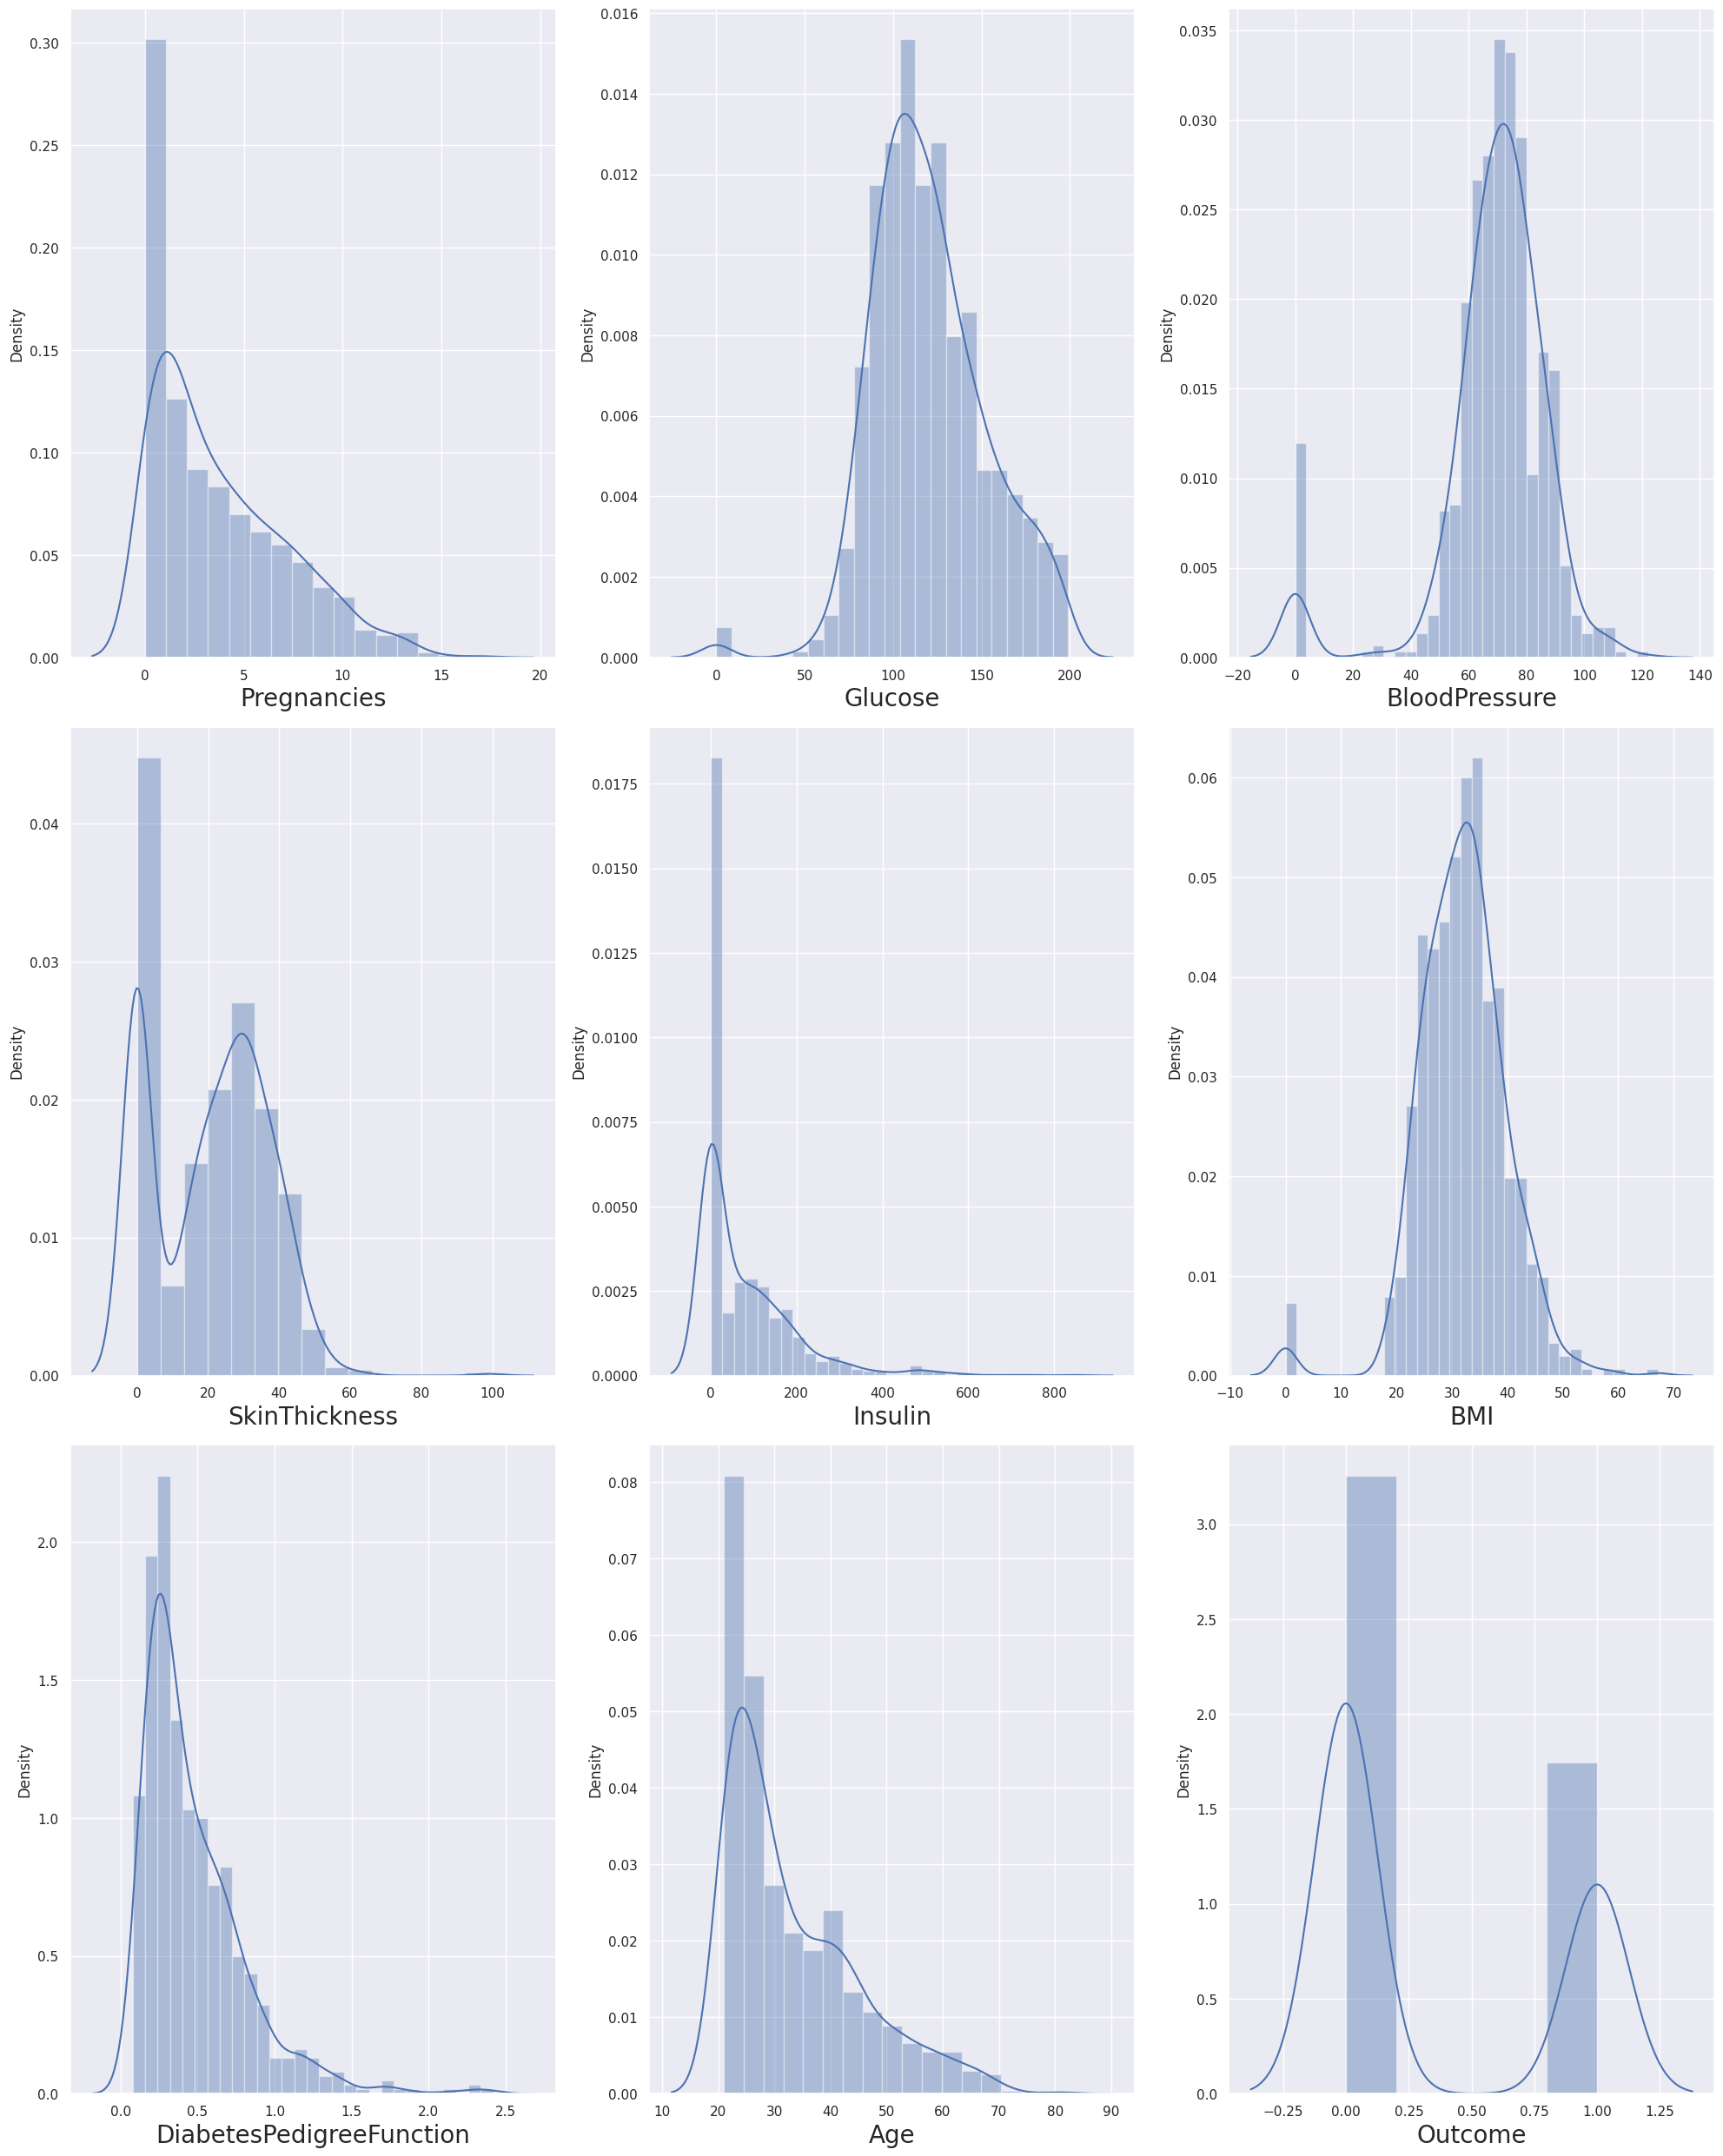

In [6]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
  if plotnumber<=9:
    ax=plt.subplot(3,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=20)
  plotnumber=plotnumber+1;
plt.tight_layout()

In [7]:
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean()) # replaces all occurrences of the value 0 in the 'SkinThickness' column of the DataFrame data with the mean value of the 'SkinThickness' column

<ipython-input-8-5ecf444cfe92>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-8-5ecf444cfe92>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-8-5ecf444cfe92>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in 

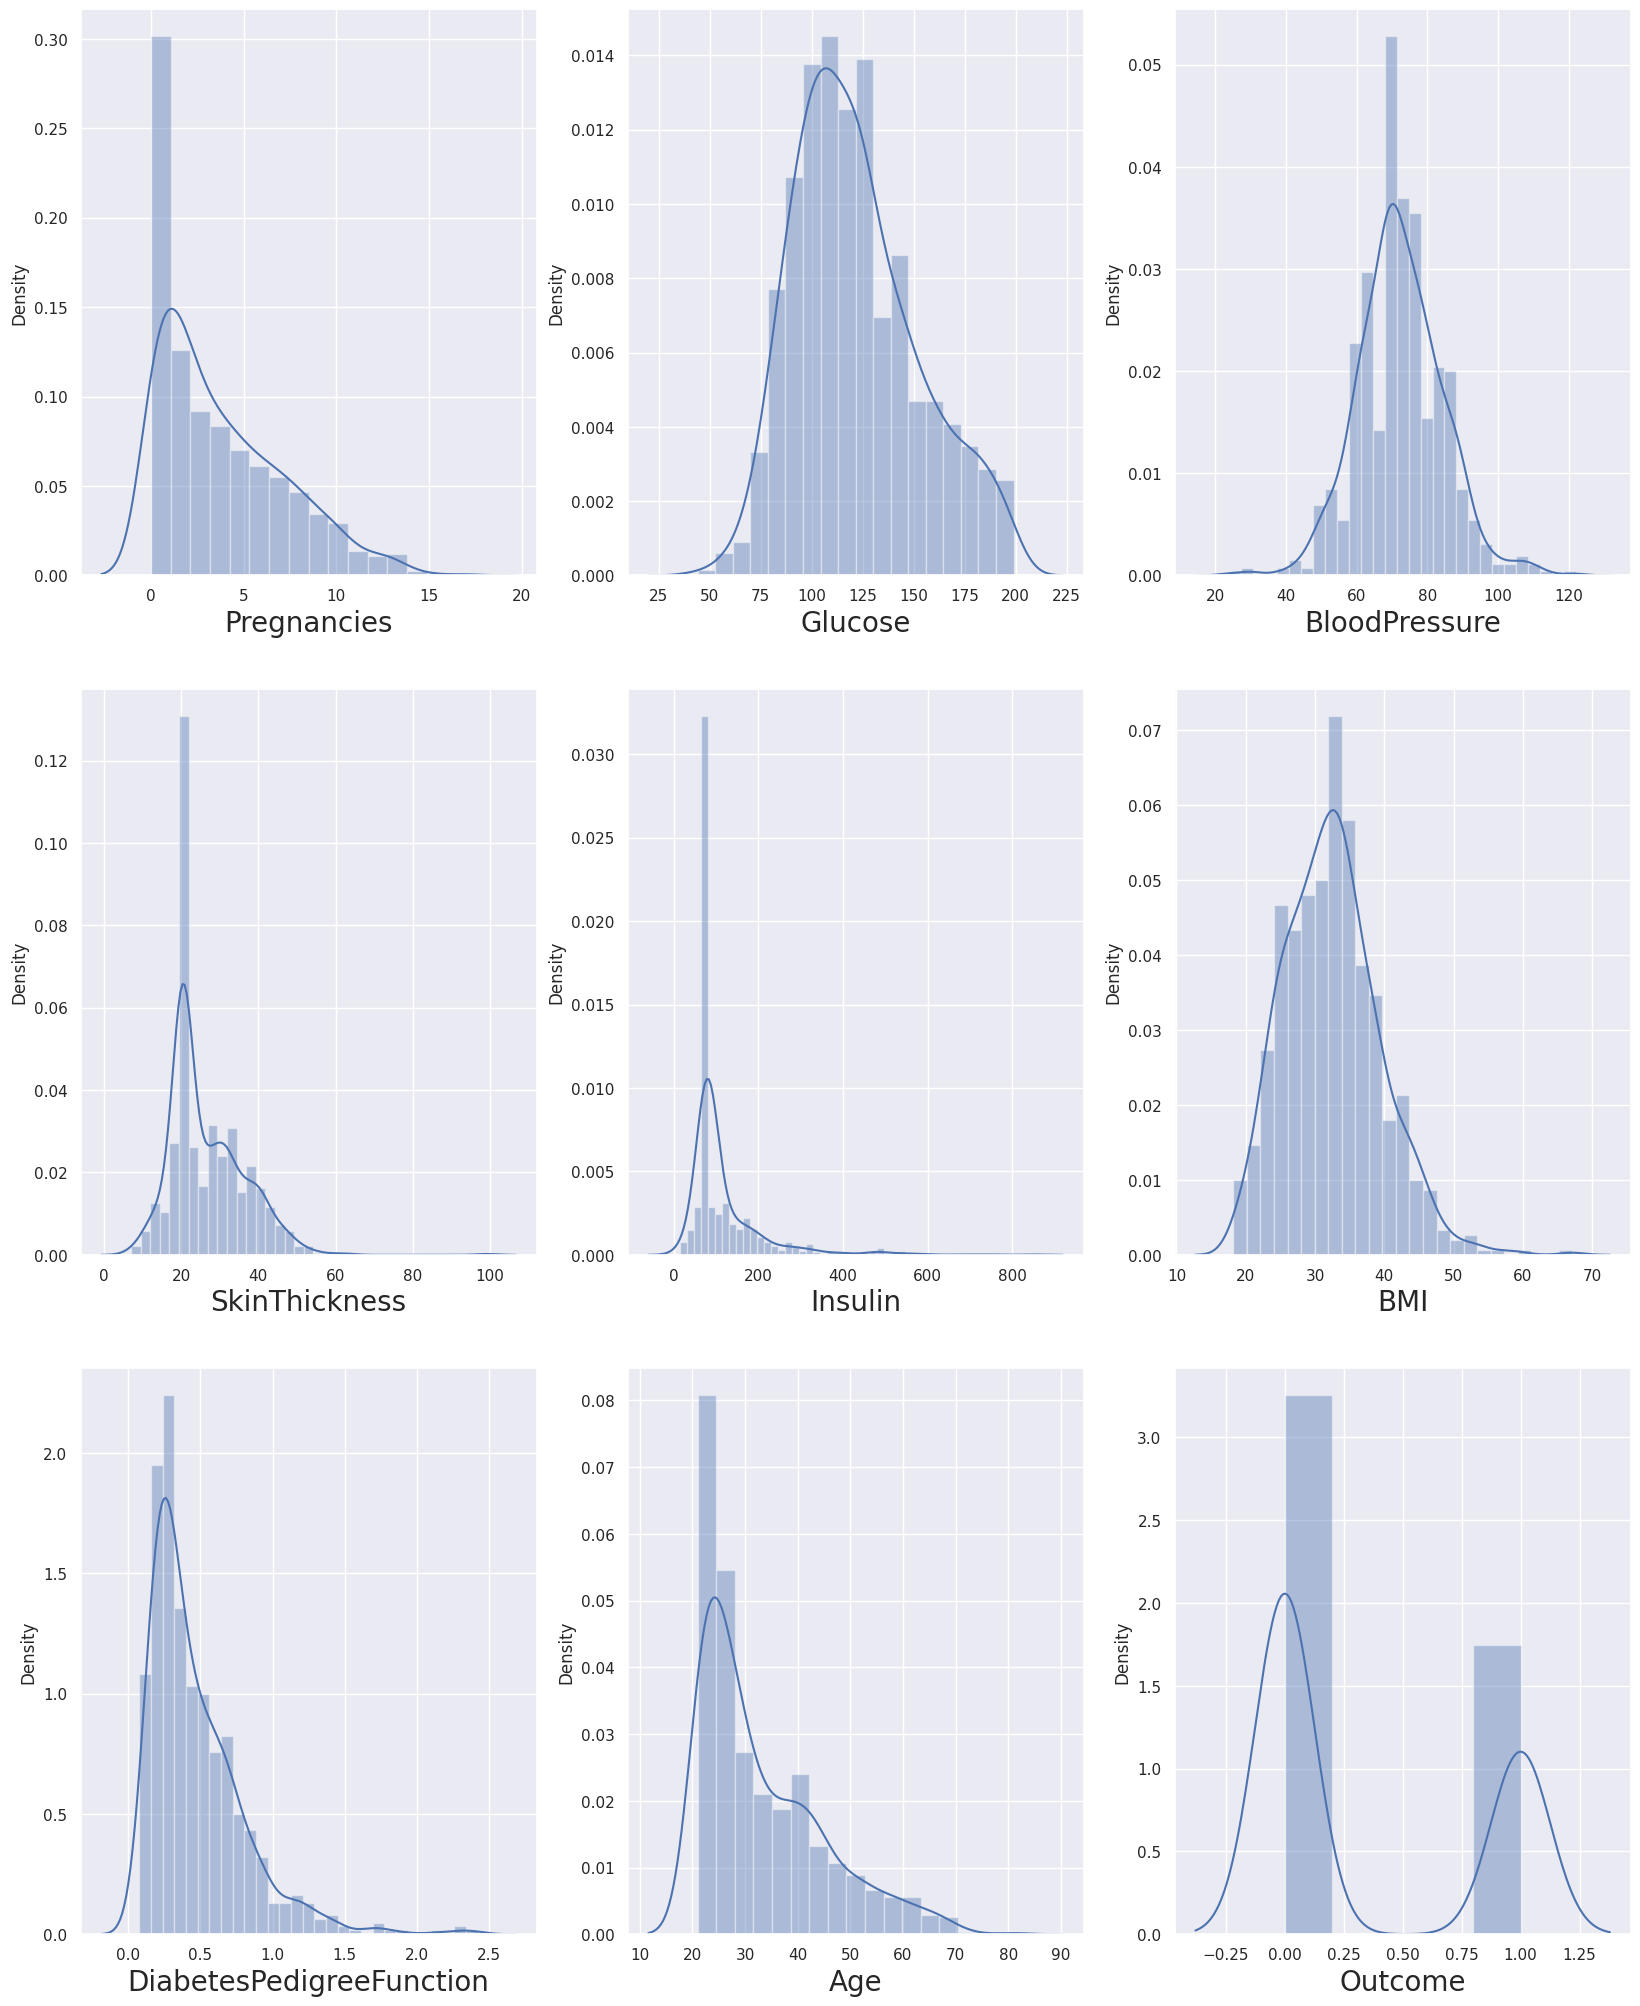

In [8]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
  if plotnumber<=9:
    ax=plt.subplot(3,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=20)
  plotnumber=plotnumber+1;
plt.show()

<Axes: >

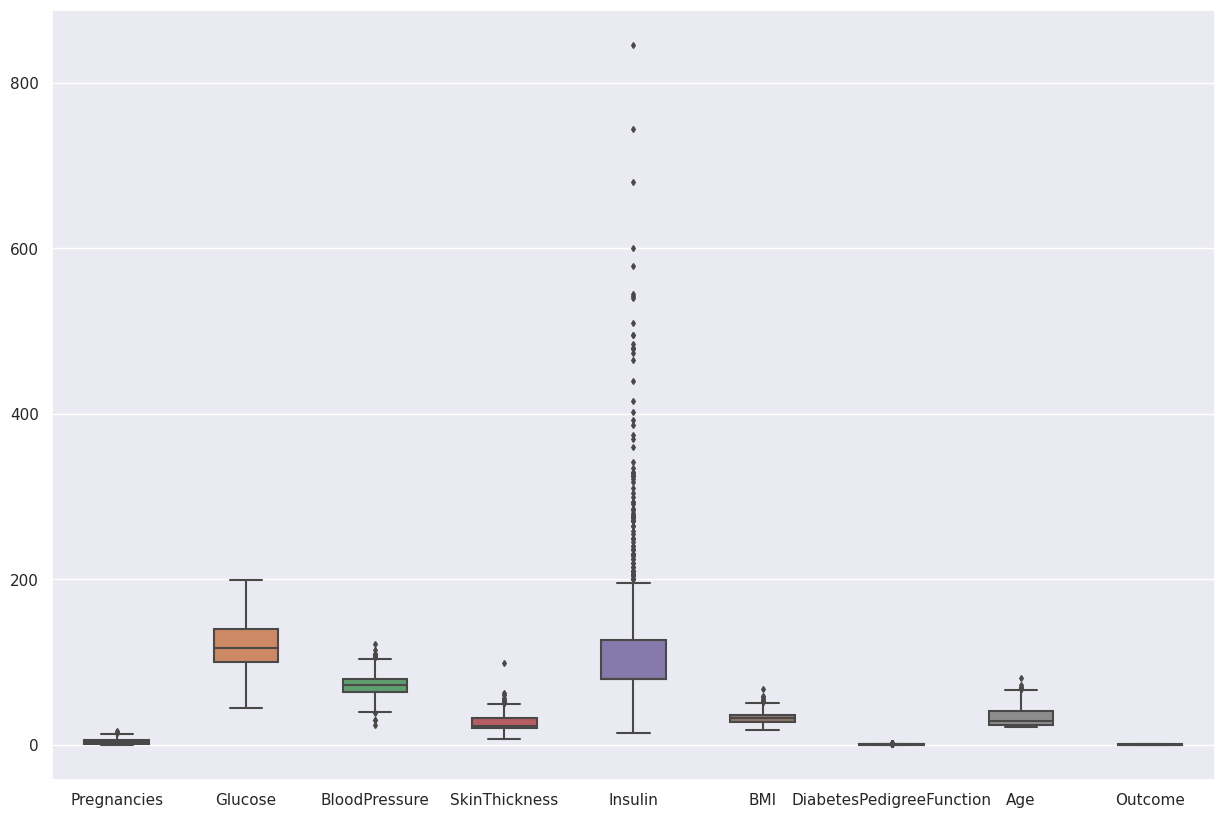

In [9]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width=0.5, ax=ax, fliersize=3)

In [10]:
q=data['Pregnancies'].quantile(0.98)
data_cleaned=data[data['Pregnancies']<q]
q= data_cleaned['BMI'].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned['BMI']<q]
q= data_cleaned['SkinThickness'].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned['SkinThickness']<q]
q= data_cleaned['Insulin'].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned['Insulin']<q]
q= data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q= data_cleaned['Age'].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned['Age']<q]



<ipython-input-11-5ecf444cfe92>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-11-5ecf444cfe92>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-11-5ecf444cfe92>:6: UserWarning: 

`distplot` is a deprecated function and will be removed 

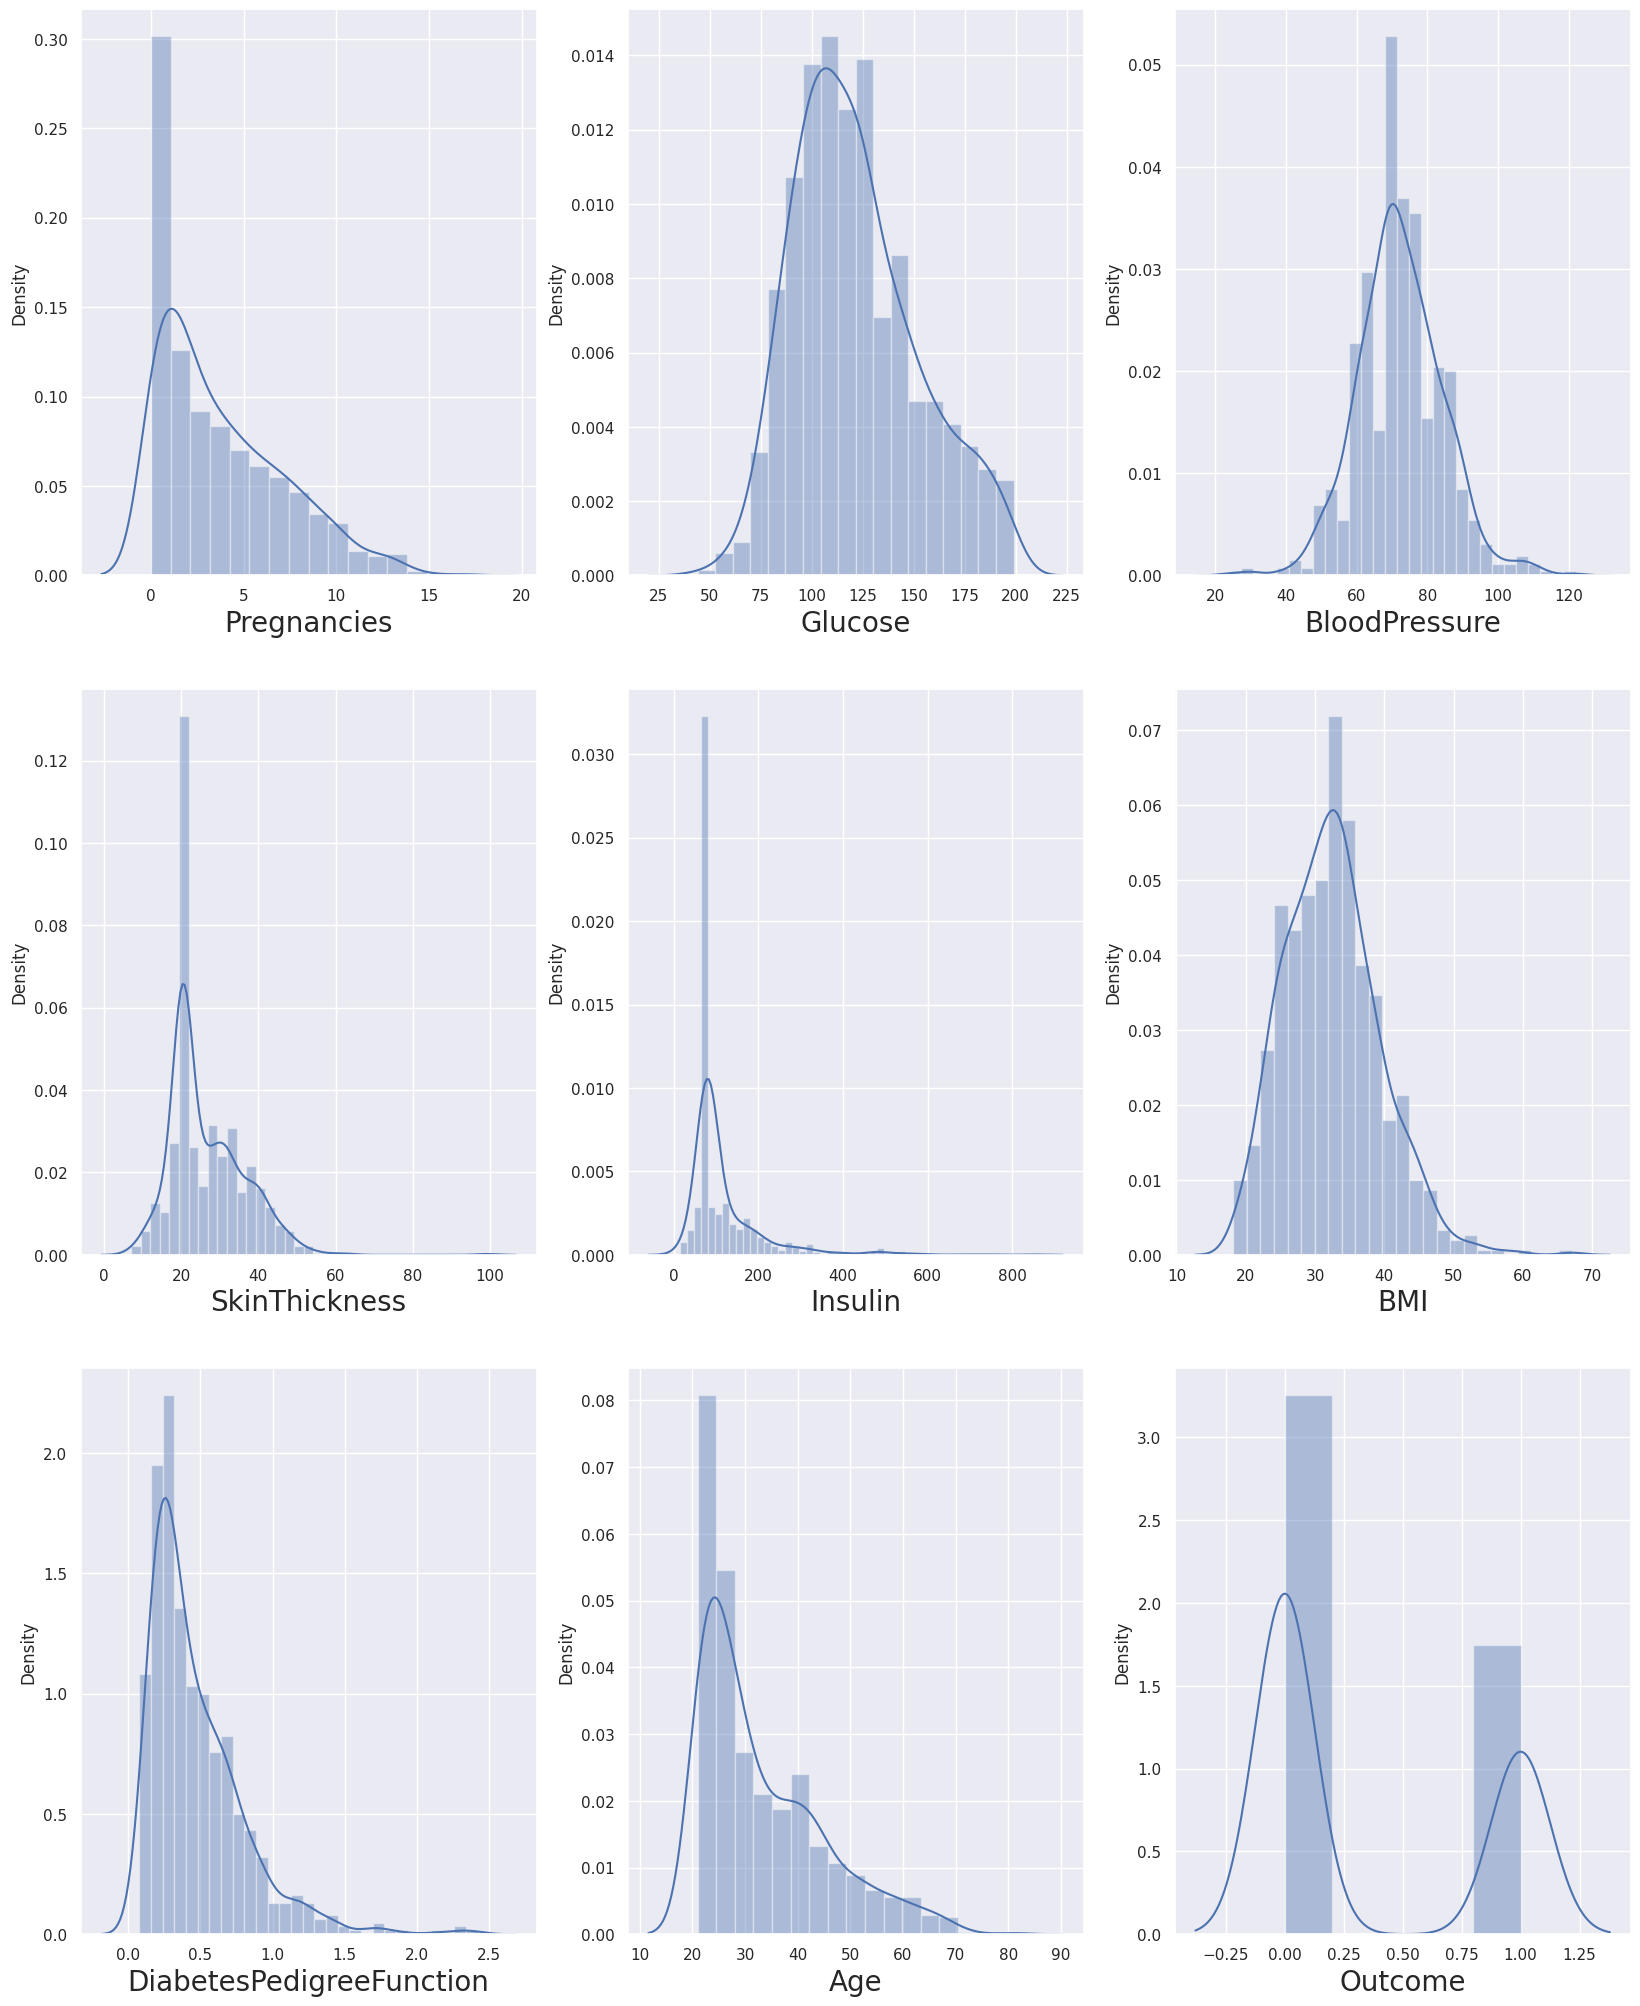

In [11]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
  if plotnumber<=9:
    ax=plt.subplot(3,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=20)
  plotnumber=plotnumber+1;
plt.show()

<Axes: >

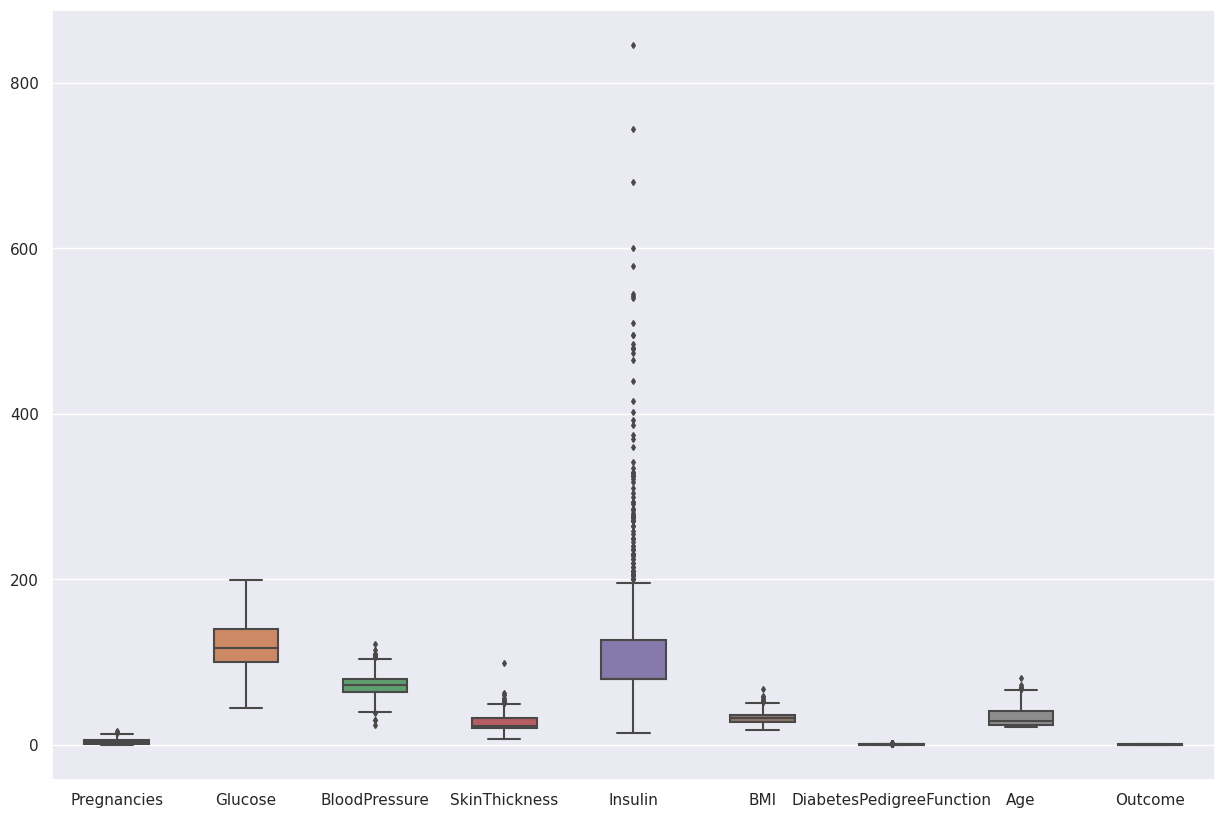

In [12]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width=0.5, ax=ax, fliersize=3)

In [13]:
X=data.drop(columns=['Outcome'])
y=data['Outcome']

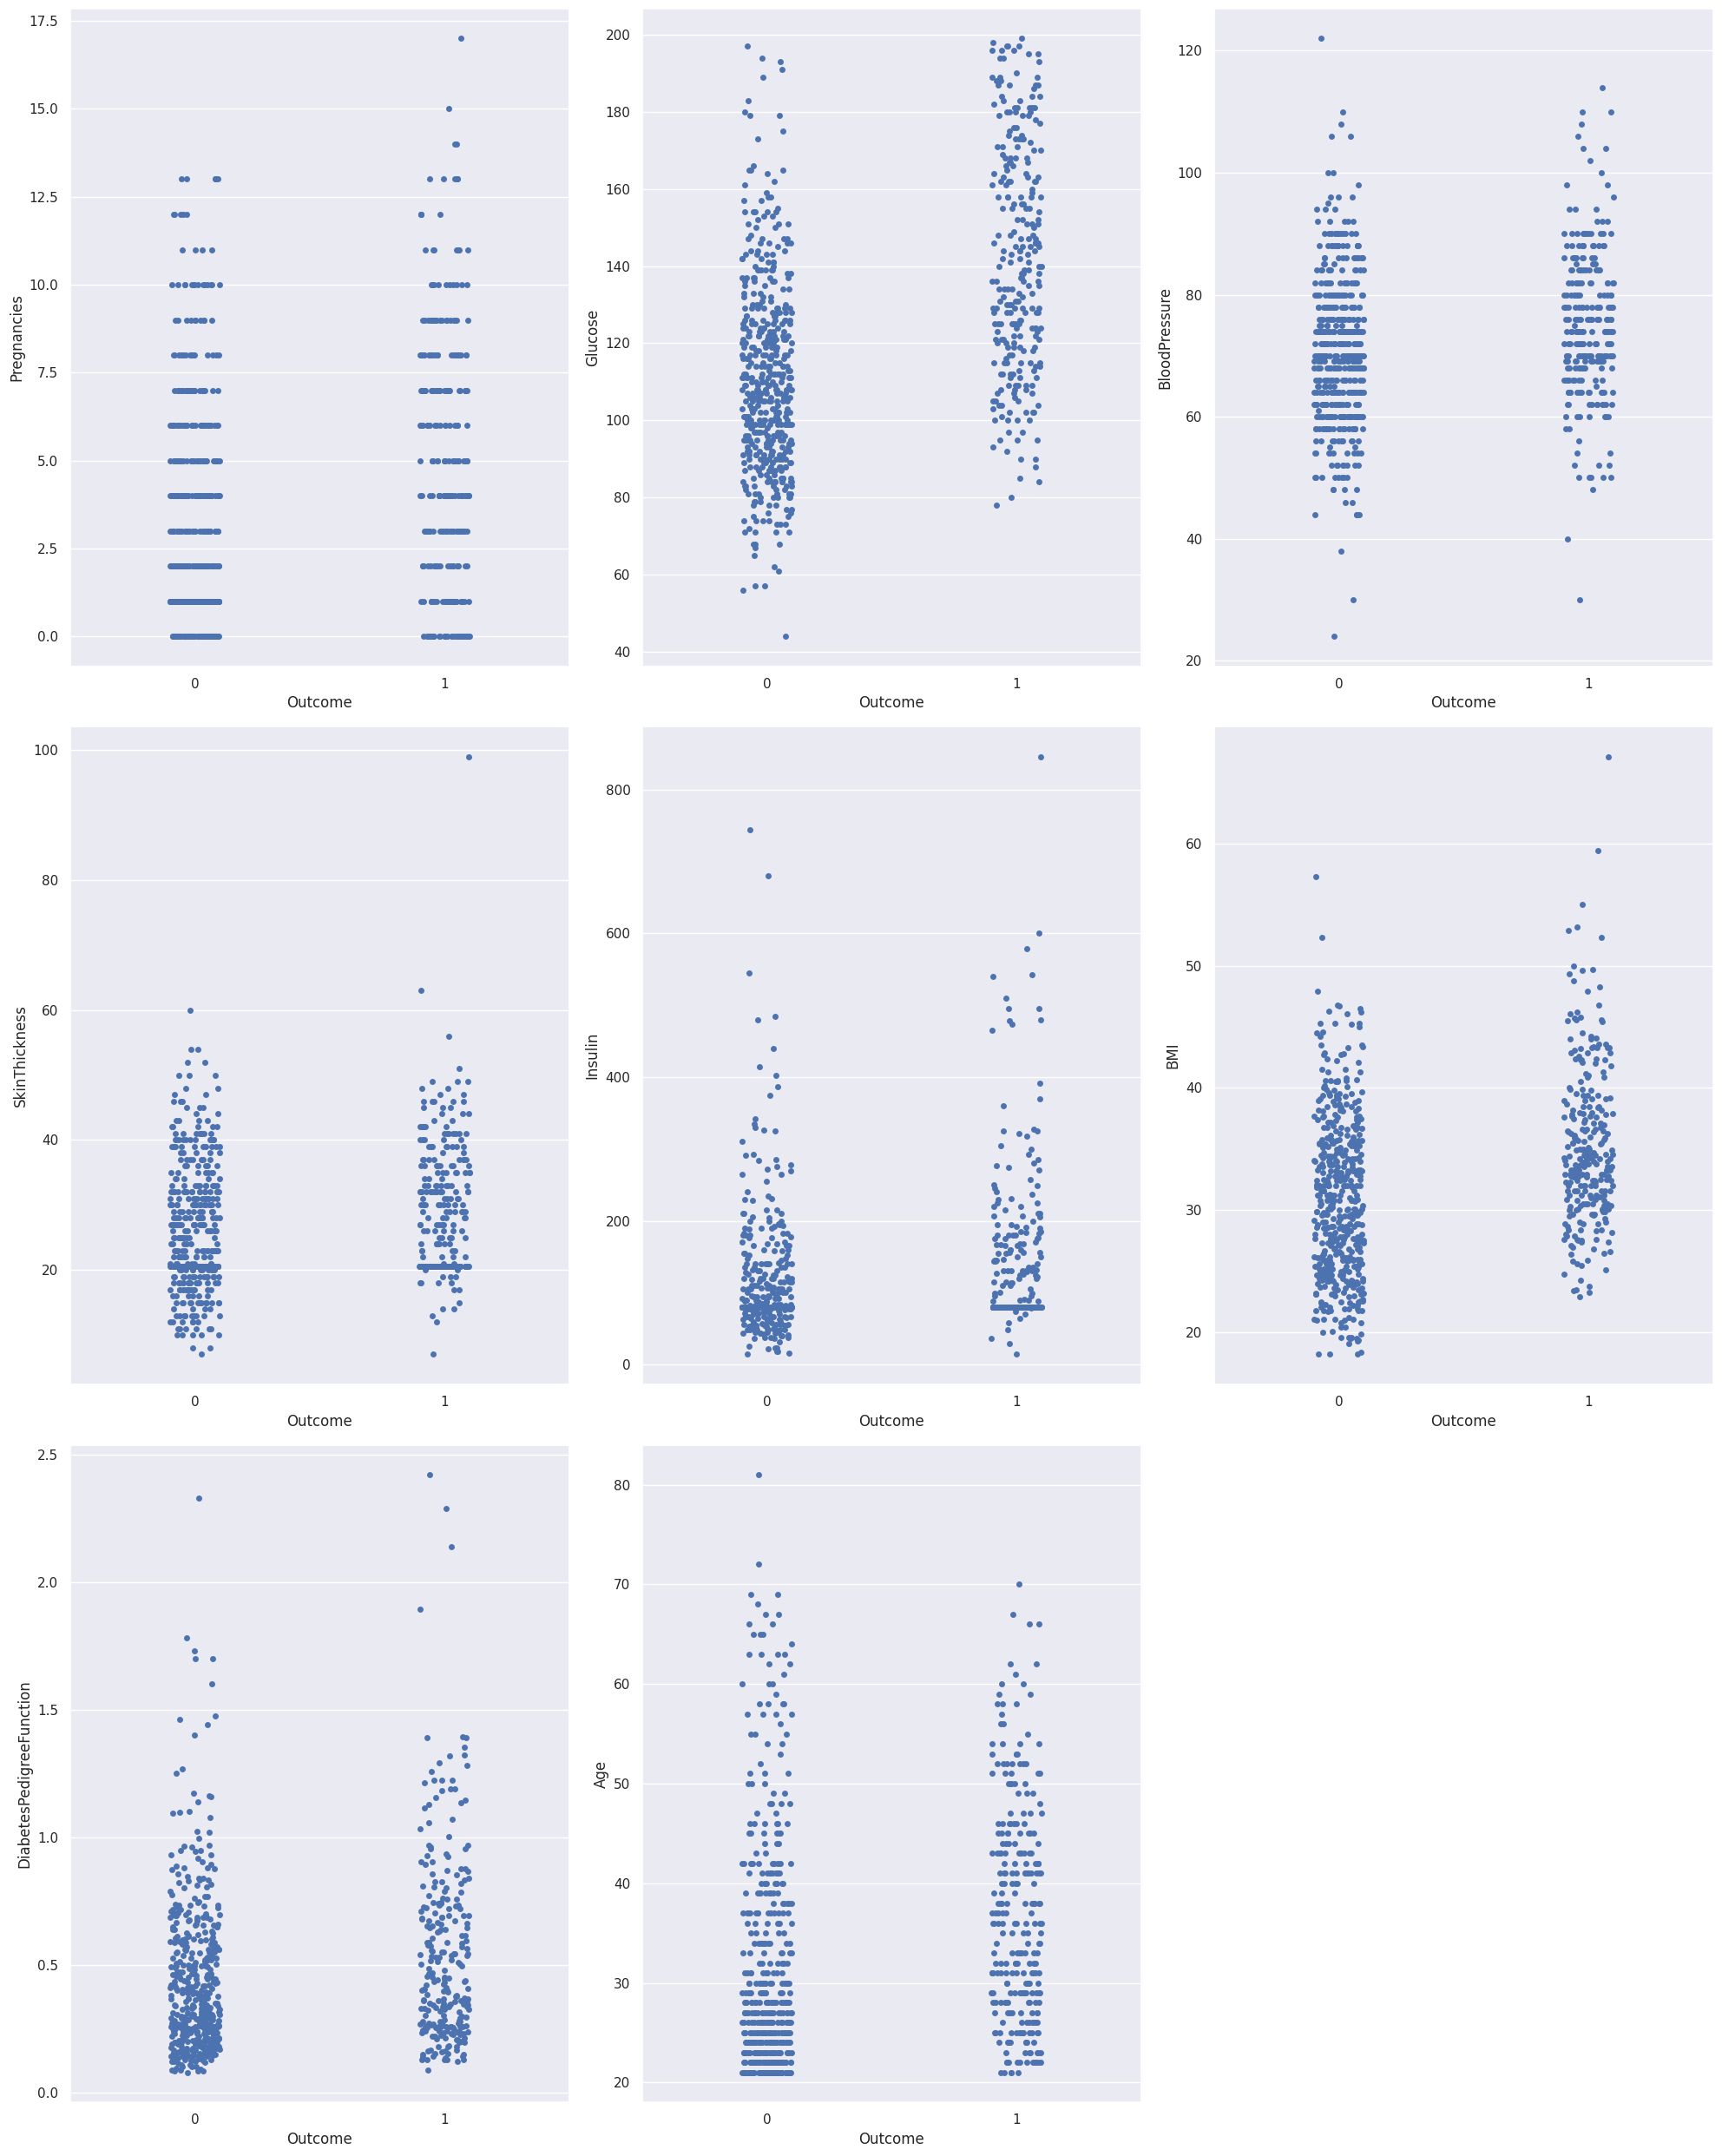

In [14]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in X:
  if plotnumber<=9:
    ax=plt.subplot(3,3,plotnumber)
    sns.stripplot(x=y,y=X[column])

  plotnumber=plotnumber+1;
plt.tight_layout()

In [15]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((576, 8), (192, 8))

In [16]:
import bz2,pickle
def scaler_standard(X_train, X_test):
  # scaling the data
  scaler=StandardScaler()
  X_train_scaled=scaler.fit_transform(X_train)
  X_test_scaled=scaler.transform(X_test)
  #saving the model
  file=bz2.BZ2File('standardScalar.pkl','wb')
  pickle.dump(scaler,file)
  file.close()
  return X_train_scaled, X_test_scaled

In [17]:
X_train_scaled, X_test_scaled= scaler_standard(X_train,X_test)

In [18]:
X_train_scaled

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]])

In [19]:
log_reg=LogisticRegression()
log_reg.fit(X_train_scaled,y_train)         #This trains the logistic regression model to learn the relationship between the scaled input features and the target values.

LogisticRegression()

In [20]:
log_reg.score(X_train_scaled,y_train) #calculates and returns the accuracy score of the trained logistic regression model

0.7708333333333334

In [21]:
def adj_r2(x,y,r2):
  n=x.shape[0]
  p=x.shape[1]
  adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
  return adjusted_r2

In [22]:
adj_r2(X_train_scaled,y_train,log_reg.score(X_train_scaled,y_train))

0.7675999412110524

In [23]:
y_pred=log_reg.predict(X_test_scaled)

In [24]:
conf_mat= confusion_matrix(y_test,y_pred)
conf_mat

array([[117,  13],
       [ 26,  36]])

In [25]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]


In [26]:
Accuracy=(true_positive+true_negative)/(true_positive+true_negative+false_positive+false_negative)
Accuracy

0.796875

In [27]:
Precision=true_positive/(true_positive+false_positive)
Precision


0.9

In [28]:
Recall=true_positive/(true_positive+false_negative)
Recall

0.8181818181818182

In [29]:
F1_score=2*(Recall*Precision)/(Recall+Precision)
F1_score

0.8571428571428572

In [30]:
auc=roc_auc_score(y_test,y_pred)
auc

0.7403225806451613

In [31]:
fpr, tpr, thresholds= roc_curve(y_test,y_pred)

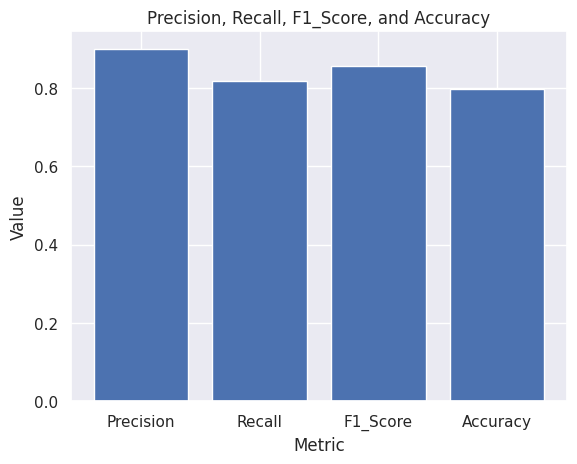

In [32]:
# Create a bar chart of the precision, recall, F1 score, and accuracy
plt.bar(["Precision", "Recall", "F1_Score", "Accuracy"], [Precision, Recall, F1_score, Accuracy])
plt.xlabel("Metric")
plt.ylabel("Value")
plt.title("Precision, Recall, F1_Score, and Accuracy")
plt.show()

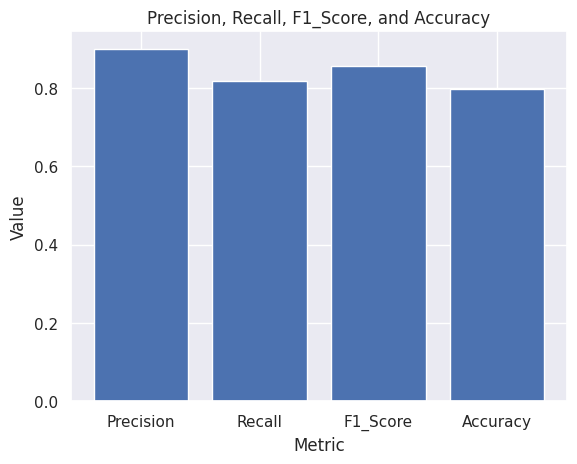

In [33]:
# Create a bar chart of the precision, recall, F1 score, and accuracy
plt.bar(["Precision", "Recall", "F1_Score", "Accuracy"], [Precision, Recall, F1_score, Accuracy])
plt.xlabel("Metric")
plt.ylabel("Value")
plt.title("Precision, Recall, F1_Score, and Accuracy")
plt.show()

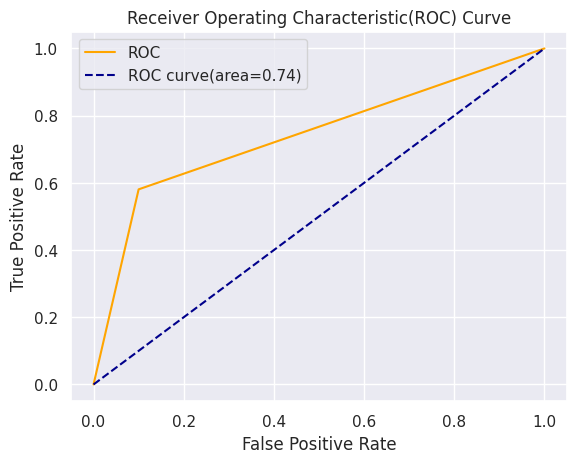

In [34]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--',label='ROC curve(area=%0.2f)'%auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC) Curve')
plt.legend()
plt.show()